<a href="https://colab.research.google.com/github/saniyanafees6/Cybersecurity-Credit-Card-Fraud-Detection/blob/master/cyber_security_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

#### Our Tasks
* Explore the [Data Set](https://)
* Decide which features are important
* Train the model
* Test the model on the testing set





In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


__Importing the Datasets__

In [0]:
train_transaction = pd.read_csv('/content/drive/My Drive/train_transaction.csv')
train_identity = pd.read_csv('/content/drive/My Drive/train_identity.csv')
test_transaction = pd.read_csv('/content/drive/My Drive/test_transaction.csv')
test_identity = pd.read_csv('/content/drive/My Drive/test_identity.csv')

In [0]:
train=pd.merge(train_transaction,train_identity,how="left",on="TransactionID")
test=pd.merge(test_transaction,test_identity,how="left",on="TransactionID")

Browsing the Data

In [149]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [150]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:

# delete the 4 variables in order to reduce the memory issue
del train_identity
del test_identity
del train_transaction
del test_transaction

In [152]:
print(len(train.isna()))
print(len(test.isna()))

590540
506691


In [0]:
cols_drop_train=[]
cols_drop_test=[]
na_train=[]
na_test=[]
for col in train.columns:
    if train[col].isna().sum()/len(train) >=0.90:
        na_train.append(col) # NA in train
for col in test.columns:
    if test[col].isna().sum()/len(test)>=0.90:
        na_test.append(col) # NA in test
for col in train.columns:
    if train[col].value_counts(dropna=False,normalize=True).values[0] >= 0.90:
        cols_drop_train.append(col) 
for col in test.columns:
    if test[col].value_counts(dropna=False,normalize=True).values[0]>=0.90:
        cols_drop_test.append(col)

In [154]:

# storing the drop columns from test and train dataset
drop_train=list(set(cols_drop_train+na_train))
drop_test=list(set(cols_drop_test+na_test))

#printing out the columns that are to be dropped from the dataset
print("columns are @ train:",drop_train)
print("columns are @ test:", drop_test)

columns are @ train: ['V296', 'V301', 'dist2', 'V108', 'V109', 'V298', 'V129', 'V113', 'V321', 'C3', 'V125', 'V102', 'V134', 'V132', 'V320', 'V104', 'V111', 'V309', 'id_21', 'V299', 'V118', 'V305', 'V105', 'V284', 'V123', 'id_08', 'V293', 'V311', 'V295', 'V297', 'V101', 'V116', 'V124', 'V286', 'V112', 'id_22', 'id_26', 'id_07', 'V137', 'V98', 'V107', 'V110', 'V290', 'V120', 'V319', 'V300', 'V318', 'V114', 'V121', 'id_25', 'V281', 'id_23', 'V115', 'V122', 'D7', 'id_24', 'V103', 'V106', 'V136', 'V117', 'V133', 'V316', 'V119', 'id_18', 'V135', 'isFraud', 'id_27']
columns are @ test: ['V301', 'dist2', 'V26', 'V24', 'V108', 'V109', 'V129', 'V113', 'V298', 'V321', 'C3', 'V77', 'V102', 'V125', 'V132', 'V134', 'V104', 'V68', 'V320', 'V111', 'V309', 'id_21', 'V299', 'V118', 'V305', 'V105', 'V284', 'V123', 'id_08', 'V27', 'V293', 'V89', 'V295', 'V311', 'V297', 'V101', 'V116', 'V28', 'V124', 'V14', 'V112', 'V286', 'id_22', 'id_26', 'id_07', 'V137', 'V98', 'V107', 'V110', 'V290', 'V67', 'V120', 'V

In [155]:
print(len(drop_train))
print(len(drop_test))


67
79


`isFraud` is an important column for the training and testing dataset, therefore we're going to remove it from the list of columns to be dropped

In [156]:
total_drop_cols=list(set(drop_train+drop_test))
total_drop_cols.remove('isFraud')
print(total_drop_cols)
print(len(total_drop_cols))

['V296', 'V301', 'dist2', 'V109', 'V108', 'V298', 'V129', 'V26', 'V113', 'V321', 'V24', 'C3', 'V125', 'V102', 'V134', 'V132', 'V320', 'V104', 'V77', 'V68', 'id_21', 'V309', 'V111', 'V299', 'V118', 'V305', 'V105', 'V284', 'V123', 'id_08', 'V27', 'V293', 'V311', 'V295', 'V89', 'V297', 'V101', 'V116', 'V124', 'V286', 'V112', 'id_22', 'id_26', 'V28', 'V14', 'id_07', 'V137', 'V98', 'V107', 'V110', 'V290', 'V67', 'V120', 'V319', 'V300', 'V318', 'V114', 'V121', 'V65', 'V55', 'id_25', 'V281', 'id_23', 'V25', 'V115', 'V23', 'V122', 'D7', 'id_24', 'V103', 'V106', 'V136', 'V117', 'V133', 'V316', 'V119', 'id_18', 'V66', 'V88', 'V135', 'V86', 'id_27']
82


In [0]:
for col in total_drop_cols:
    train.drop(col,axis=1,inplace=True)
    test.drop(col,axis=1,inplace=True)
    

In [158]:
train.shape


(590540, 352)

In [159]:
test.shape


(506691, 351)

In [0]:
train = train.replace([np.inf,-np.inf],np.nan)
test = test.replace([np.inf,-np.inf],np.nan)


In [0]:
# for i in train.columns:
    
#     print(type(train[i]))
# train.dtypes

for i in train.columns:
    if train[i].dtype != type(object):
      train[i].fillna(train[i].median(),inplace=True)
      

In [0]:
for i in test.columns:
    if test[i].dtype != type(object):
      test[i].fillna(test[i].median(),inplace=True)
      

In [0]:
for i in train.columns:
  train[i].fillna(train[i].value_counts().idxmax(),inplace=True)
  

In [0]:
for i in test.columns:
  test[i].fillna(test[i].value_counts().idxmax(),inplace=True)
  

In [165]:
train.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,361.0,150.0,discover,142.0,credit,315.0,87.0,19.0,gmail.com,gmail.com,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,97.0,13.0,26.0,10.0,0.0,37.875,0.666666,13.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,341.0,472.0,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,8.0,gmail.com,gmail.com,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,0.0,10.0,0.0,37.875,0.666666,0.0,43.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,341.0,472.0,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,outlook.com,gmail.com,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,0.0,10.0,0.0,37.875,0.666666,0.0,315.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,341.0,472.0,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,8.0,yahoo.com,gmail.com,2.0,5.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,0.0,37.875,0.666666,84.0,43.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,341.0,472.0,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,8.0,gmail.com,gmail.com,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,26.0,10.0,0.0,37.875,0.666666,15.0,43.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70787.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,-480.0,New,NotFound,166.0,542.0,144.0,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [166]:
test.head()


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,gmail.com,gmail.com,6.0,6.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,0.0,37.708332,0.666666,418.0,203.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,133189.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,27.0,-300.0,Found,Found,166.0,321.0,484.0,Found,Found,Windows 10,chrome 70.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,aol.com,gmail.com,3.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,0.0,37.708332,0.666666,231.0,634.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,133189.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,27.0,-300.0,Found,Found,166.0,321.0,484.0,Found,Found,Windows 10,chrome 70.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,hotmail.com,gmail.com,2.0,2.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,0.0,37.708332,0.666666,136.0,136.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,133189.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,27.0,-300.0,Found,Found,166.0,321.0,484.0,Found,Found,Windows 10,chrome 70.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,gmail.com,gmail.com,5.0,2.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,0.0,37.708332,0.666666,242.0,242.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,133189.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,27.0,-300.0,Found,Found,166.0,321.0,484.0,Found,Found,Windows 10,chrome 70.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,gmail.com,gmail.com,6.0,6.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,0.0,37.708332,0.666666,22.0,22.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,133189.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,27.0,-300.0,Found,Found,166.0,321.0,484.0,Found,Found,Windows 10,chrome 70.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows


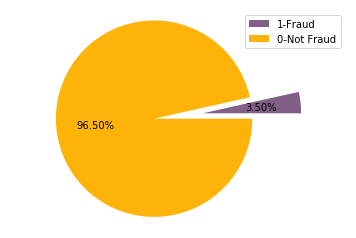

In [167]:

# Initializing Pie Chart for Visualizing the above Data

labels = '1-Fraud', '0-Not Fraud'
sizes = [len(train[train['isFraud'] == 1]), len(train[train['isFraud'] == 0])]
colors = ["dusty purple","amber"]
explode = (0.5, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, colors=sns.xkcd_palette(colors), autopct='%1.2f%%', shadow=False, startangle=0)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [0]:
# plt.figure(figsize=(15,10))
# sns.heatmap(train.corr())


In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize
le = preprocessing.LabelEncoder()
for i in train.columns:
    if train[i].dtype == type(object):
        train[i] = le.fit_transform(train[i])

In [0]:
for i in test.columns:
  if test[i].dtype == type(object):
    test[i] = le.fit_transform(test[i])

In [0]:
X_train = train.drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
y_train = train['isFraud']
X_test = test.drop(['TransactionDT', 'TransactionID'], axis=1)
testy = test[['TransactionID']]



# Fit and predict!


In [0]:
from sklearn.linear_model import LogisticRegression


In [173]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = lr.predict(X_test)

In [175]:
len(y_pred)

506691

In [176]:
len(testy)

506691

In [0]:
solution = pd.DataFrame({"TransactionID": testy.TransactionID, 'isFraud': y_pred})
solution.to_csv('fraud_predictions.csv', index=False)